### Import Libraries 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report  # Import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

#formats
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
display(HTML("<style>.container { width:100% !important; }</style>"))

### Import Dataset

In [2]:
df = pd.read_csv('/home/clivence/base_jupyter/Datadump/Master_data_base.csv')


# df = pd.read_csv('/home/clivence/base_jupyter/Datadump/edata.csv')
df.head()

,datetime,open,high,low,close,25EMA,50EMA,100EMA,125EMA,Ticker,Interval,Month,Year,Date,Primary_Key,Trend Status,Spread,Action,Opportunity,Order Type,Alerts,Index_Special,Alerts_Index,ROI Since Alert,Lowest Low,Highest High,Low Spread,High Spread,1D Trade Status
0,2020-12-11 03:00:00,1.32780,1.32905,1.31740,1.31830,1.318300,1.318300,1.318300,1.318300,GBP/USD,4h,January,2020,2020-12-11 03:00:00,GBP/USD4h2020-12-11 03:00:00,Consolidating,0.000000,NaN,Suboptimal,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0
1,2020-12-11 07:00:00,1.31830,1.32555,1.31350,1.32120,1.318523,1.318414,1.318357,1.318346,GBP/USD,4h,January,2020,2020-12-11 07:00:00,GBP/USD4h2020-12-11 07:00:00,Bullish,0.000109,NaN,Unfavorable,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0
2,2020-12-11 11:00:00,1.32180,1.32315,1.31885,1.32265,1.318841,1.318580,1.318442,1.318414,GBP/USD,4h,January,2020,2020-12-11 11:00:00,GBP/USD4h2020-12-11 11:00:00,Bullish,0.000261,NaN,Unfavorable,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0
3,2020-12-11 15:00:00,1.32265,1.32365,1.32140,1.32260,1.319130,1.318738,1.318525,1.318481,GBP/USD,4h,January,2020,2020-12-11 15:00:00,GBP/USD4h2020-12-11 15:00:00,Bullish,0.000392,NaN,Unfavorable,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0
4,2020-12-13 15:00:00,1.33680,1.33785,1.33155,1.33170,1.320097,1.319246,1.318786,1.318691,GBP/USD,4h,January,2020,2020-12-13 15:00:00,GBP/USD4h2020-12-13 15:00:00,Bullish,0.000851,NaN,Unfavorable,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0


### Data Cleaning

In [3]:
#Subset for trades
df = df[df['Alerts'] ==1] 
df = df[df['Action'] == 'Ultimate Action']
df = df[df['Ticker'] == 'GBP/USD']
df.fillna(0, inplace=True)


In [4]:
# df.head()
df.columns

Index(['datetime', 'open', 'high', 'low', 'close', '25EMA', '50EMA', '100EMA',
       '125EMA', 'Ticker', 'Interval', 'Month', 'Year', 'Date', 'Primary_Key',
       'Trend Status', 'Spread', 'Action', 'Opportunity', 'Order Type',
       'Alerts', 'Index_Special', 'Alerts_Index', 'ROI Since Alert',
       'Lowest Low', 'Highest High', 'Low Spread', 'High Spread',
       '1D Trade Status'],
      dtype='object')

In [5]:
#Subset of features to keep
# df= df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA','100EMA', '125EMA',
#         'Trend Status', 'Spread','5075 Trend Status', '75100 Trend Status',
#        '100125 Trend Status', 'Action', 'Opportunity', 'Order Type','2D Lowest Price',
#        '2D Highest Price', '2D Low in Pips', '2D High in Pips',
#        '2D Trade Status', '2D Hard Stop Price', '2D Hard Stop Loss',
#        '2D Trend Change Stop Price', '2D Trend Change Stop Loss']]
df= df[['open', 'high', 'low', 'close', '25EMA', '50EMA','100EMA', '125EMA',
        'Trend Status', 'Spread', 'Action', 'Opportunity', 'Order Type','1D Trade Status']]

In [6]:
#Apply one-hot encoding 
df= pd.get_dummies(df,columns=['Trend Status', 'Action', 'Opportunity', 'Order Type'])

In [7]:
# df.head(20)
df.columns

Index(['open', 'high', 'low', 'close', '25EMA', '50EMA', '100EMA', '125EMA',
       'Spread', '1D Trade Status', 'Trend Status_Bearish',
       'Trend Status_Bullish', 'Action_Ultimate Action', 'Opportunity_Optimal',
       'Opportunity_Unfavorable', 'Order Type_BUY', 'Order Type_SELL'],
      dtype='object')

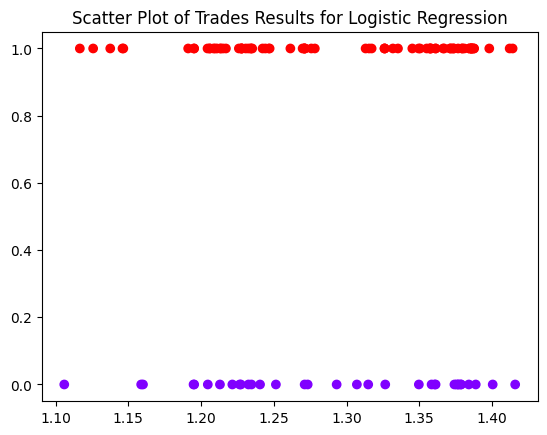

In [8]:
#Create a scatter plot of the target variable 
plt.scatter(x=df['close'],y=df['1D Trade Status'], c=df['1D Trade Status'], cmap='rainbow')
plt.title('Scatter Plot of Trades Results for Logistic Regression')
plt.show()

In [9]:
df['1D Trade Status'].value_counts()

1D Trade Status
1    82
0    34
Name: count, dtype: int64

### Split Data: Training & Test Data

In [10]:
#Indepedent Variables 
X = df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish','Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable', 'Order Type_BUY',
       'Order Type_SELL']]
#Dependent Variable
Y = df['1D Trade Status'] 

In [11]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

### Algoritm Selection 

In [12]:
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

### Evaluate Results 

In [13]:
accuracy = accuracy_score(Y_test,Y_pred)
classification_rep =classification_report(Y_test,Y_pred)

print(f"Accuracy:", accuracy)
print(f"\nClassfication Report:\n",classification_rep )

Accuracy: 0.6666666666666666

Classfication Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.67      1.00      0.80        16

    accuracy                           0.67        24
   macro avg       0.33      0.50      0.40        24
weighted avg       0.44      0.67      0.53        24



/home/clivence/base_jupyter/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/clivence/base_jupyter/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/clivence/base_jupyter/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Displaying using confusion matrix
confusion_matrix(Y_test,Y_pred)

array([[ 0,  8],
       [ 0, 16]])

In [15]:
log_reg_sc = cross_val_score(LogisticRegression(),X,Y,cv=10)

print('scores', log_reg_sc)

log_reg_sc.mean()

scores [0.75       0.75       0.66666667 0.66666667 0.66666667 0.66666667
 0.72727273 0.72727273 0.72727273 0.72727273]


0.7075757575757576

In [16]:
basic_bag_model = BaggingClassifier(
    estimator=LogisticRegression(),
    n_estimators=100,
    max_samples=.8,
    oob_score=True,
    random_state=0
)

basic_bag_model.fit(X_train,Y_train)

print(basic_bag_model.oob_score_)

basic_bag_model.score(X_test,Y_test)


0.717391304347826


0.6666666666666666

## Gradient Boosting Model 


In [17]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3,stratify=Y, random_state=42)

gbc = GradientBoostingClassifier(n_estimators=25, learning_rate=.1,max_depth=1, random_state=42).fit(X_train, Y_train)

gbc.score(X_test, Y_test)

0.6857142857142857

In [18]:
gbc_cv = cross_val_score(GradientBoostingClassifier(n_estimators=25, learning_rate=.1,max_depth=2,random_state=42),X,Y,cv=10)

print(gbc_cv)
print(gbc_cv.mean())

[0.75       0.75       0.41666667 0.5        0.58333333 0.66666667
 0.45454545 0.72727273 0.72727273 0.72727273]
0.6303030303030304


## DecisionTree Classifier 

In [19]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=42)


In [20]:
scores = cross_val_score(DecisionTreeClassifier(),X,Y,cv=10)

In [21]:
scores

array([0.41666667, 0.58333333, 0.58333333, 0.41666667, 0.33333333,
       0.58333333, 0.45454545, 0.54545455, 0.45454545, 0.18181818])

In [22]:
scores.mean()

0.45530303030303027

## Bagging Classifier 

## Bagging Classifier & Decision Trees

In [23]:
basic_bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=.8,
    oob_score=True,
    random_state=0
)

basic_bag_model.fit(X_train,Y_train)

print(basic_bag_model.oob_score_)

basic_bag_model.score(X_test,Y_test)

0.5869565217391305


0.5833333333333334

## Bagging Classifier & Gradient Boosting 

In [24]:
basic_bag_model = BaggingClassifier(
    estimator=GradientBoostingClassifier(n_estimators=25, learning_rate=.1,max_depth=1, random_state=42),
    n_estimators=100,
    max_samples=.8,
    oob_score=True,
    random_state=0
)

basic_bag_model.fit(X_train,Y_train)

basic_bag_model.score(X_test,Y_test)



0.7083333333333334